# Métricas de Desempeño

## Clasificación

In [41]:
#Importaciones
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

In [42]:
#Leemos los datos
candies = pd.read_csv("./candy-data.csv")
candies

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [43]:
#Predecimos cosas random
predicted = np.random.binomial(1, 0.6, 85)

In [44]:
#Se lo ponemos al dataframe
df_pred = pd.DataFrame(predicted, columns = ["chocolate_pred"])
candies["chocolate_pred"] = df_pred

In [45]:
#Convertimos en int
candies.astype({'chocolate_pred' : 'int'})

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,chocolate_pred
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,0
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,1
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282,1
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898,1
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519,1
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308,0


In [46]:
#Matriz de confusión
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(candies["chocolate"], candies["chocolate_pred"])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['No Chocolate', 'Chocolate'])

<Figure size 640x480 with 0 Axes>

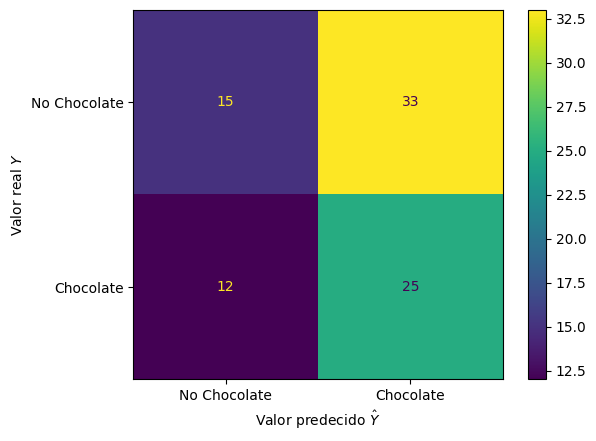

In [47]:
#Mostramos la gráfica de confusión
import matplotlib.pyplot as plt
plt.figure()
cm_display.plot()
plt.ylabel('Valor real $Y$')
plt.xlabel('Valor predecido $\hat{Y}$')
plt.show()

## AUC y ROC

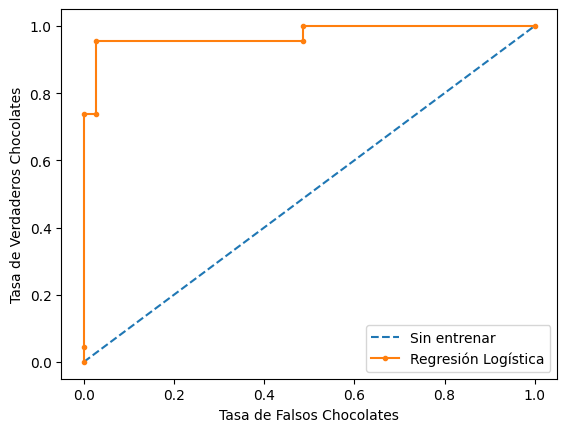

In [48]:
# https://www.themachinelearners.com/curva-roc-vs-prec-recall/
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = candies[['fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus',
             'sugarpercent', 'pricepercent', 'winpercent']]
y = candies[['chocolate']]
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.7)

model = LogisticRegression()
model.fit(trainX, trainy)

# Predecimos las probabilidades
lr_probs = model.predict_proba(testX)

#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]

ns_probs = [0 for _ in range(len(testy))]

ns_fpr, ns_tpr, _ = metrics.roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = metrics.roc_curve(testy, lr_probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')

# Etiquetas de los ejes
plt.xlabel('Tasa de Falsos Chocolates')
plt.ylabel('Tasa de Verdaderos Chocolates')
plt.legend()
plt.show()